PRUEBAS DISTRIBUCIÓN DE COLORES

In [24]:
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
import median_cut
from math import sqrt
import pandas as pd
import time
import cv2
#import scipy.io as sio # Permite cargar un fichero de GNU Octave/MATLAB

# APLICAR MASCARA

In [28]:
#tarda mucho:(

imagen = imread('Flores_png/CRW_5622.png')
bin_mask = imread('Mascaras/CRW_5622_mask.png')

bin_mask.shape[0]

2056

17.67176651954651


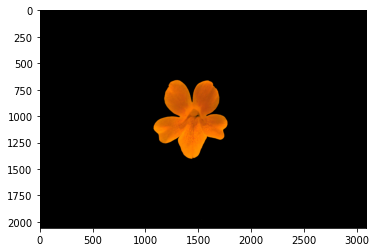

In [22]:
inicio = time.time()

# Código a medir
time.sleep(1)
# -------------

image=imagen.copy()

for largo in range(bin_mask.shape[0]):
    for ancho in range(bin_mask.shape[1]):
        #print(bin_mask[largo,ancho])
        #print(sum(bin_mask[largo,ancho]))
        if bin_mask[largo,ancho] == 0:
            #print("a")
            #print(bin_mask[largo,ancho])
            image[largo,ancho,0]=0
            image[largo,ancho,1]=0
            image[largo,ancho,2]=0
        
plt.imshow(image);

fin = time.time()
print(fin-inicio) # 1.0005340576171875

1.0964856147766113


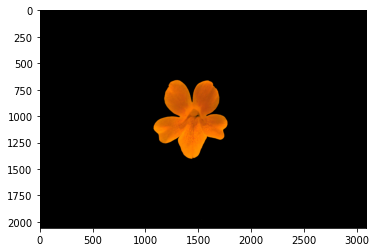

In [33]:
inicio = time.time()

# Código a medir
time.sleep(1)
# -------------

image=imagen.copy()
image = cv2.bitwise_and(image,image, mask=bin_mask)

        
plt.imshow(image);

fin = time.time()
print(fin-inicio) # 1.0005340576171875

# Cargar foto

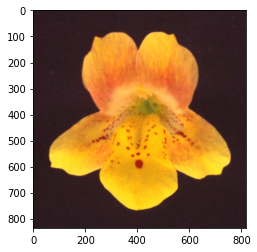

(836, 818, 3)

In [4]:
image = imread('img/f2_brillo.jpg')
bird = image[:,:,0:3]
plt.imshow(bird)
plt.show()
bird.shape

# MEAN SHIFT

se demora caletaaaa

In [5]:
def plot_segmentation_meanshift(image, bandwidth):
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(image.reshape((-1,3)))
    cc = ms.cluster_centers_.astype(np.uint8)
    out = np.asarray([cc[i] for i in ms.labels_]).reshape(image.shape)   
    plt.imshow(out)
    plt.show()    

In [8]:
plot_segmentation_meanshift(bird, bandwidth=30)

# GMM

In [9]:
def plot_segmentation_gaussian_mixture(image, k=2):  
    gmm = GaussianMixture(n_components=k, covariance_type="tied") #covariance_type=full, spherical, diagonal, tied
    gmm = gmm.fit(image.reshape((-1,3)))
    labels = gmm.predict(image.reshape((-1,3)))
    cc = gmm.means_.astype(np.uint8)
    out = np.asarray([cc[i] for i in labels]).reshape(image.shape)
    plt.imshow(out)
    plt.show()  

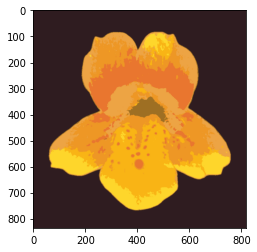

In [12]:
plot_segmentation_gaussian_mixture(bird, k=7)

QUANTIZATION

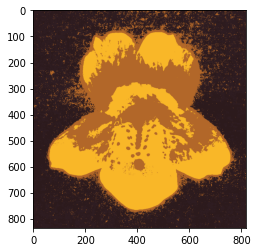

In [444]:
median_cut.plot_median_cut(bird, 4)

HISTOGRAMA

In [4]:
def plot_histogram_rgb(image):
    colors = ("red", "green", "blue")
    channel_ids = (0, 1, 2)
    plt.figure()
    plt.xlim([0, 256])
    #plt.ylim([0, 10000])
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(image[:, :, channel_id], bins=256, range=(0, 256))
        plt.plot(bin_edges[0:-1], histogram, color=c)
    plt.show()

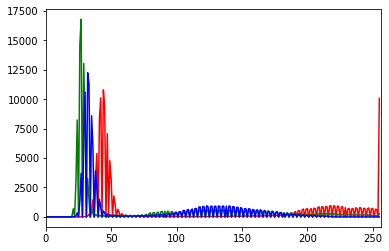

In [503]:
plot_histogram_rgb(bird)

COLOR QUE MAS SE REPITE

In [447]:
colors, count = np.unique(bird.reshape(-1, bird.shape[-1]), axis=0, return_counts=True)
print(colors[np.argsort(-count)][:5])

[[48 29 31]
 [49 30 32]
 [47 28 30]
 [46 27 29]
 [45 29 30]]


K-MEANS

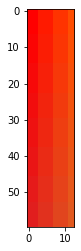

In [864]:
image = imread('img/Colores.png')
bird=image[:60,:13,:]
plt.imshow(image[:60,:13,:]);

In [449]:
#image = imread('img/chiquito_rosadp.png')
#sum(sum(image[:,:,0])/(image.shape[0]*image.shape[1]))
#(h,w,c) = image.shape
#img2D = image.reshape(h*w,c)
#[sum(img2D[:,0])/img2D.shape[0], sum(img2D[:,1])/img2D.shape[0], sum(img2D[:,2])/img2D.shape[0]]
#image[:,:,0]

In [865]:
def dominant_colors(image, k=2):
    km = KMeans(n_clusters=k).fit(image[:,:,0:3].reshape((-1,3)))
    i = 0
    plt.figure(0,figsize=(15,3))
    plt.subplot(1,k+1,1)
    plt.imshow(image)
    plt.axis('off')
    for color in km.cluster_centers_:
        plt.subplot(1,k+1,i+2)
        plt.axis("off")
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = color
        plt.imshow(a)
        percent = list(km.labels_).count(i)/len(km.labels_)
        plt.title(f"{round(percent*100)}%")
        print(color)
        i += 1 

In [866]:
interact(dominant_colors, image=fixed(bird), k=(1,10));

interactive(children=(IntSlider(value=2, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

In [452]:
def plot_segmentation_kmeans(image, k=2):
    km = KMeans(n_clusters=k).fit(image.reshape((-1,4)))
    cc = km.cluster_centers_.astype(np.uint8)
    out = np.asarray([cc[i] for i in km.labels_]).reshape(image.shape)    
    percent=[]
    for i in range(len(km.cluster_centers_)):
        j=list(km.labels_).count(i)/(len(km.labels_))
        percent.append(j)
    fig = plt.figure(figsize=(13, 5))
    ax1 = fig.add_subplot(121) 
    ax2 = fig.add_subplot(122)  
    ax1.imshow(out)  
    ax1.axis('off')
    ax2.pie(percent,colors=np.array(km.cluster_centers_/255),autopct="%1.0f%%")
    plt.show()

In [882]:
interact(plot_segmentation_kmeans, image=fixed(bird), k=(2,10));

interactive(children=(IntSlider(value=2, description='k', max=10, min=2), Output()), _dom_classes=('widget-int…

# IDEA 1.2

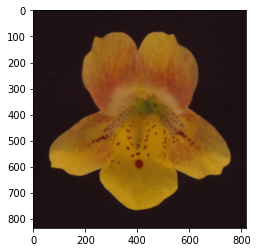

(836, 818, 3)

In [121]:
#f2(jpg),f4,f5,f6

image = imread('img/f2.jpg')
bird = image[:,:,0:3]
plt.imshow(bird)
plt.show()
bird.shape

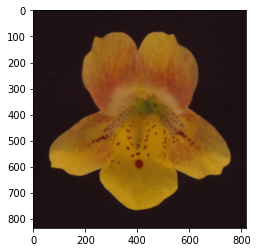

(836, 818, 3)

In [122]:
bird = image[:,:,0:3]
plt.imshow(bird)
plt.show()
bird.shape

In [123]:
#import time
#inicio = time.time()

# Código a medir
#time.sleep(1)
# -------------

In [124]:
# r, n, a, v, c, az, ros, m, negroooo
#clusters = np.array([255 0 19],[250 189 5],[255 255 0],[31 224 74],[14 241 241],[5 23 250],[158 4 251],[249 6 231])
#[217, 197, 28]
#rosado1[148, 78, 88]*
#rosado2[212, 107, 124]
#rosado3[199, 78, 104]
#naranjo1[224, 137, 30]
#naranjo2[226, 80, 28]*
#rojo1[227, 58, 27]
#rojo2[243,22,12] *
#rojo3[200,0,0]
#clusters = [[255, 0, 19],[250, 189, 5],[217, 197, 28],[31, 224, 74],[14, 241, 241],[5, 23, 250],[158, 4, 251],[249, 6, 231]]
#clusters = [[227, 58, 27],[224, 137, 30],[217, 197, 28],[31, 224, 74],[14, 241, 241],[5, 23, 250],[158, 4, 251],[249, 6, 231]]
clusters_label=["rojo","naranjo","amarillo","verde","celeste","azul","morado","rosado","negro"]
#clusters = [[243,22,12],[226, 80, 28],[217, 197, 28],[174, 226, 28],[14, 241, 241],[5, 23, 250],[158, 4, 251],[148, 78, 88],[40,25,32]]
clusters = [[200,0,0],[226, 80, 28],[217, 197, 28],[174, 226, 28],[14, 241, 241],[5, 23, 250],[158, 4, 251],[148, 78, 88],[40,25,32]]

In [125]:
def distancia_euclidiana(A,B):
    return sqrt((A[0]-B[0])**2+(A[1]-B[1])**2+(A[2]-B[2])**2)
    
def distancia_chebyshev(A,B):
    return max(abs(A[0]-B[0]),abs(A[1]-B[1]),abs(A[2]-B[2]))

def distancia_manhatan(A,B):
    return abs(A[0]-B[0])+abs(A[1]-B[1])+abs(A[2]-B[2])

def min_distancia(A):
    #distancias = [0,0,0,0,0,0,0,0] #sin negro
    distancias = [0,0,0,0,0,0,0,0,0] #con negro
    for i in range(len(clusters)):
        distancias[i]=distancia_euclidiana(A,clusters[i])
        #distancias[i]=distancia_chebyshev(A,clusters[i])
        #distancias[i]=distancia_manhatan(A,clusters[i])
    #print(distancias)
    #print(distancias.index(min(distancias)))
    return distancias.index(min(distancias))

In [126]:
clustered_image = np.zeros(bird.shape[0]*bird.shape[1],dtype=int)
i=0
for alto in range(bird.shape[0]):
    for largo in range(bird.shape[1]):
        if bird[alto,largo,0] != 0 and bird[alto,largo,1] != 0 and  bird[alto,largo,2] != 0:
            clustered_image[i]=min_distancia(bird[alto,largo,:])
            #print(clustered_image[i],"\n")
        else:
            clustered_image[i]=100
        i+=1

In [127]:
#contar = [0,0,0,0,0,0,0,0,0] #sin negro
contar = [0,0,0,0,0,0,0,0,0,0] #con negro
for i in clustered_image:
    #print(i)
    if i == 100:
        contar[-1]+=1
    else:
        contar[i]+=1
contar

[219, 88472, 19591, 0, 0, 0, 0, 177204, 397443, 919]

In [128]:
contar_p=np.float_(contar[:-2])/np.float_(sum(contar[:-2]))*100
contar_p

array([ 0.07671129, 30.98996098,  6.862333  ,  0.        ,  0.        ,
        0.        ,  0.        , 62.07099472])

In [129]:
#pd.DataFrame([contar_aux],columns=clusters_label_aux,index=range(8))

pd.DataFrame([contar_p],columns=clusters_label[:-1],index=range(8))

pd.DataFrame([contar_p, [50,50,0,0,0,0,0,0],[25,25,25,25,0,0,0,0],[10,20,10,10,10,10,20,10]],columns=clusters_label[:-1],index=range(4))
#pd.DataFrame([[0.0, 22.483727,75.677133,0.0,0.0,0.0,0.0,1.83914], [50,50,0,0,0,0,0,0],[25,25,25,25,0,0,0,0],[10,20,10,10,10,10,20,10]],columns=clusters_label[:-1],index=range(4))

rojo    naranjo   amarillo  verde  celeste  azul  morado     rosado
0   0.076711  30.989961   6.862333    0.0      0.0   0.0     0.0  62.070995
1  50.000000  50.000000   0.000000    0.0      0.0   0.0     0.0   0.000000
2  25.000000  25.000000  25.000000   25.0      0.0   0.0     0.0   0.000000
3  10.000000  20.000000  10.000000   10.0     10.0  10.0    20.0  10.000000

In [130]:
image=bird.copy()
i=0
for alto in range(bird.shape[0]):
    for largo in range(bird.shape[1]):
        #print(bird[alto,largo])
        if bird[alto,largo,0] != 0 and bird[alto,largo,1] != 0 and  bird[alto,largo,2] != 0:
            image[alto,largo]=clusters[clustered_image[i]]
        i+=1


In [131]:
clusters_label_aux = []
contar_aux=[]
for a in range(len(contar_p)):
    if contar_p[a]!=0:
        clusters_label_aux.append(clusters_label[a])
        contar_aux.append(contar_p[a])
[clusters_label_aux, contar_aux]



[['rojo', 'naranjo', 'amarillo', 'rosado'],
 [0.07671129232256572, 30.98996097882208, 6.862333004070252, 62.0709947247851]]

In [132]:
cluster_aux=[]
for label in clusters_label_aux:
    
    cluster_aux.append(clusters[clusters_label.index(label)])

In [133]:
cluster_aux

[[200, 0, 0], [226, 80, 28], [217, 197, 28], [148, 78, 88]]

[[200.   0.   0.]
 [226.  80.  28.]
 [217. 197.  28.]
 [148.  78.  88.]]


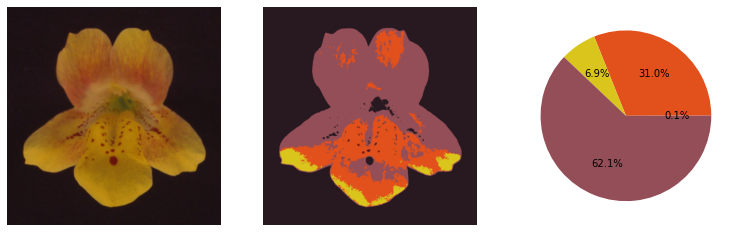

In [134]:
clusters=np.float_(cluster_aux)
print(clusters)
#clusters=(cluster_aux)
fig = plt.figure(figsize=(13, 5))
ax1 = fig.add_subplot(131) 
ax2 = fig.add_subplot(132)  
ax3 = fig.add_subplot(133)
ax1.imshow(bird)
ax1.axis('off')
ax2.imshow(image)  
ax2.axis('off')
ax3.pie(contar_aux,colors=np.array(clusters/255),autopct="%1.1f%%")
plt.show()

In [135]:
#fin = time.time()
#print(fin-inicio) # 1.0005340576171875

In [136]:
i = 0
plt.figure(0,figsize=(15,3))
plt.subplot(1,4+1,1)
plt.imshow(bird)
plt.axis('off')
for color in cluster_aux:
    plt.subplot(1,4+1,i+2)
    plt.axis("off")
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = color
    plt.imshow(a)
    percent = contar_aux
    plt.title(f"{round(contar_aux[i],1)}%")
    #print(color)
    i += 1 

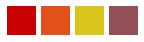

In [137]:
i=0
for color in clusters:
        plt.subplot(1,10,i+2)
        plt.axis("off")
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = color
        plt.imshow(a)
        #print(color)
        i += 1 